In [45]:
%config Completer.use_jedi = False
import pycocotools.mask as mask_util
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [62]:
def decode_coco_segments(coco_json_file, threshold):
    '''Takes coco json file dir with dictionary of segmentations 
     decode the counts, merge then, and 
     Returns the predicted binary mask'''
    
    ## Read and parse our json file
    with open(coco_json_file, 'r') as my_file:
        data = my_file.readlines()
    # Parse file
    obj = json.loads(data[0])
    
    ## iterate and decode segmentations
    binary_mask = np.zeros(obj[0]['segmentation']['size'])

    for i in range(len(obj)):
        # Check the prediction score
        if obj[i]['score'] > threshold:
            seg_dict = {}
            seg_dict = {'size': obj[i]['segmentation']['size'], 'counts' : obj[i]['segmentation']['counts']}
        
            poly = mask_util.decode(seg_dict)[:, :]
            binary_mask += poly
    return binary_mask

    

In [65]:
# Test our function
json_dir = 'D:/coco_instances_results.json'

masks = decode_coco_segments(json_dir, threshold=0.6)

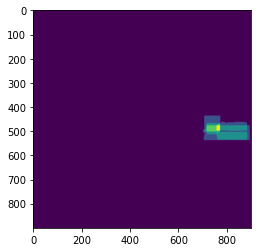

In [66]:
plt.imshow(masks)